$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 1: Linear Regression

*by Vignesh M. Pagadala*

## Overview

In this assignment, we attempt to formulate a linear model for a dataset. We have at our disposal a dataset containing many instances of inputs and the corresponding, target outputs for each input data sample. We achieve this by trying to arrive at the suitable weight for each feature (which we think might influence the target). Obviously, the most optimum (best) set of weights would be one for which the sum of the squared errors is the lowest, and hence, we try to find those weights for which the error is the least.

We look into two ways of doing this:
    1. By using simple calculus.
    2. By using Stochastic Gradient Descent. 

## Method

We first look into, how the error function can be expressed mathematically. The error function which we need to minimize is represented as:
$$
\begin{align*}
\sum_{n=1}^N (t_n - g(\xv_n;\wv))^2
\end{align*}
$$
where $t_n$, $x_n$, $w$ and $N$ represent the target data, the input data, weight and number of samples respectively.

We can find the best $w$ to minimize the above equation by taking the partial derivative with respect to $w$ and equating it to zero. Doing this we get,

$$
\begin{align*}
\frac{\partial \sum_{n=1}^N (\tv_n - g(\xv_n;\wv))^2}{\partial \wv} 
&= -2 \sum_{n=1}^N (\tv_n - \xv_n^T \wv) \xv_n^T\\
\end{align*}
$$

To speeden up the process, it would be to our advantage if we can perform this summation through the use of matrices (in Python). Therefore, the above expression can be stated in terms of matrices as,

$$
\begin{align*}
& -2 \Xv^T (\Tv - \Xv \wv)
\end{align*}
$$

Equating this to zero and solving for $w$ gives us,

$$
\begin{align*}
\wv &= (\Xv^T \Xv)^{-1} \Xv^T \Tv
\end{align*}
$$

The following functions are defined in the cells below:
1. train: Takes two parameters X and T, where X is the input data and T is the target data. Standardizes the input data and returns a dictionary with the keys ```means```, ```stds```, ```w```. 
2. use: Takes in the parameters model (dictionary with the keys as returned by train) and X (target input data). Prediction is done in this function using the input data and the model.
3. error: Computes the root-mean-squared error between the predicted and target values, and returns the same.
4. trainSGD: Computes the optimum weights using Stochastic Gradient Descent, and returns a dictionary of the same type as the train function.

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# To supress warnings.
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

## 1. train

In [3]:
def train(X, T):
    # Standardize input data (X)

    # Calculate mean and std.
    means = X.mean(axis = 0)
    std = X.std(axis = 0)

    Xs = (X - means) / std

    # Tack a column of 1s
    Xs = np.insert(Xs, 0, 1, 1)

    # Use Xs to generate model (w)
    w = np.linalg.lstsq(Xs.T @ Xs, Xs.T @ T, rcond = None)[0]

    # Return as a dictionary
    dict = {'means': means, 'stds': std, 'w': w}
    return dict

## 2. use

In [4]:
def use(model, X):
    # Use model and input X to predict.
    means = model['means']
    std = model['stds']
    w = model['w']

    # Standardize X
    Xs = (X - means) / std

    # Tack column of 1s
    Xs = np.insert(Xs, 0, 1, 1)

    # Predict
    predict = Xs @ w
    return predict

## 3. rmse

In [5]:
def rmse(predict, T):
    rmerr = np.sqrt(np.mean((T - predict) ** 2))
    return rmerr

# Stochastic Gradient Descent
In some cases, where the number of data samples are very large, the above methodology of finding the optimum weights might be a very time-consuming process. However, there's a way by which, we can do this in a sequnetial manner, where instead of trying to find the summation over the entire dataset, we may just calculate the squared-error-derivative for each sample, and accordingly update the weight.

This can be visualized by considering the squared-error-function curve, where the objective is to get to the lowest point of this curve (to get minimum error). At each point, we determine the derivative, and make a small move towards the direction of the negative gradient, like a ball rolling downhill.

The weight-update to be done at each point can be mathematically represented as,

$$
\begin{align*}
\wv^{(k+1)} &= \wv^{(k)} + \eta \xv_n (\tv_n^T - \xv_n^T  \wv) 
\end{align*}
$$

## 4. trainSGD

In [6]:
def trainSGD(X, T, learningRate, numberOfIterations):
    # Standardize inputs X.
    means = X.mean(axis = 0)
    std = X.std(axis = 0)
    Xs = (X - means) / std

    nSamples = Xs.shape[0]
    ncolsT = T.shape[1]

    # Tack a column of 1s
    Xs = np.insert(Xs, 0, 1, 1)
    ncolsX = Xs.shape[1]
    # Initialize weights to zero.
    w = np.zeros((ncolsX, ncolsT))

    # SGD training
    for i in range(numberOfIterations):
        for n in range(nSamples):
            predicted = Xs[n:n+1, :] @ w
            w += learningRate * Xs[n:n+1, :].T * (T[n:n+1, :] - predicted)

    dict = {'means': means, 'stds': std, 'w': w}
    return dict

## Examples

In [7]:
import numpy as np

X = np.arange(10).reshape((5,2))
T = X[:,0:1] + 2 * X[:,1:2] + np.random.uniform(-1, 1,(5, 1))
print('Inputs')
print(X)
print('Targets')
print(T)

Inputs
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
Targets
[[ 2.37636416]
 [ 7.24871586]
 [13.80708294]
 [19.60499899]
 [26.76818487]]


In [8]:
model = train(X, T)
model

{'means': array([4., 5.]),
 'stds': array([2.82842712, 2.82842712]),
 'w': array([[13.96106936],
        [ 4.32324553],
        [ 4.32324553]])}

In [9]:
predicted = use(model, X)
predicted

array([[ 1.73308445],
       [ 7.84707691],
       [13.96106936],
       [20.07506182],
       [26.18905427]])

In [10]:
rmse(predicted, T)

0.5199822803545219

In [11]:
modelSGD = trainSGD(X, T, 0.01, 100)
modelSGD

{'means': array([4., 5.]),
 'stds': array([2.82842712, 2.82842712]),
 'w': array([[13.87721187],
        [ 4.32960073],
        [ 4.32960073]])}

In [12]:
predicted = use(modelSGD, X)
predicted

array([[ 1.63125171],
       [ 7.75423179],
       [13.87721187],
       [20.00019195],
       [26.12317203]])

In [13]:
rmse(predicted, T)

0.5268540653798236

## Data - Appliances Energy Prediction Data Set
Source: Luis Candanedo, luismiguel.candanedoibarra '@' umons.ac.be, University of Mons (UMONS). 

This dataset, recorded by Luis Candanedo from the University of Mons, basically reflects the energy-usage of appliances and lights in a house with low energy usage, monitored at 10-minute intervals over a period of four and a half months, which affords us a total of 19735 data samples. 

The features include the lights and appliances' energy usage, and the temperature and humidity of various locations within the building, outside temperature, pressure, windspeed, visibility and dew point.
The temperature and humidity were recorded using a ZigBee wireless network of sensors, where each sensor pushed the observed data every 3.3 minutes, which was then averaged over a 10 minute period. For recording the energy output (of the appliances and lights), m-bus energy meters were used to grab the values every 10 minutes. The weather-related data was taken from a weather station nearby.   

We use the applicances and lights' energy data (2nd and 3rd columns) as the target data, and the remaining columns (excluding the last two columns) and input data. This gives us 24 features as input and 2 features as the desired target outputs, each containing 19735 samples.

Firstly, let's load the data and split it into input and target variables.

In [14]:
# Load the csv data.
dframe=pd.read_csv('energydata_complete.csv', sep=',',header=None)
# Filter out required columns.
dframe = dframe.drop(dframe.columns[[0, -2, -1]], axis=1)
# Input data columns
Xlabels = []
Xl = dframe.iloc[0, 2:]
for i in Xl:
    Xlabels.append(i)
# Target data columns
Tlabels = []
Tl = dframe.iloc[0, :2]
for i in Tl:
    Tlabels.append(i)

# Get target.
Td = dframe.iloc[1:, [0,1]]
Td = Td.as_matrix()
Tenergy = Td.astype(float)

# Get input.
Xd = dframe.iloc[1:, 2:]
Xd = Xd.as_matrix()
Xenergy = Xd.astype(float)

Let's take a look at the data and see if a linear relationship exists between some input and target variables. 

One possible relationship which might exist would be between the outside temperature and appliance energy usage. Let's see if this exists.

In [15]:
tempOut = Xenergy[:, 18]
tempOut[:10]

array([6.6       , 6.48333333, 6.36666667, 6.25      , 6.13333333,
       6.01666667, 5.9       , 5.91666667, 5.93333333, 5.95      ])

In [16]:
appEnergy = Tenergy[:, 0]
appEnergy[:10]

array([60., 60., 50., 50., 60., 50., 60., 60., 60., 70.])

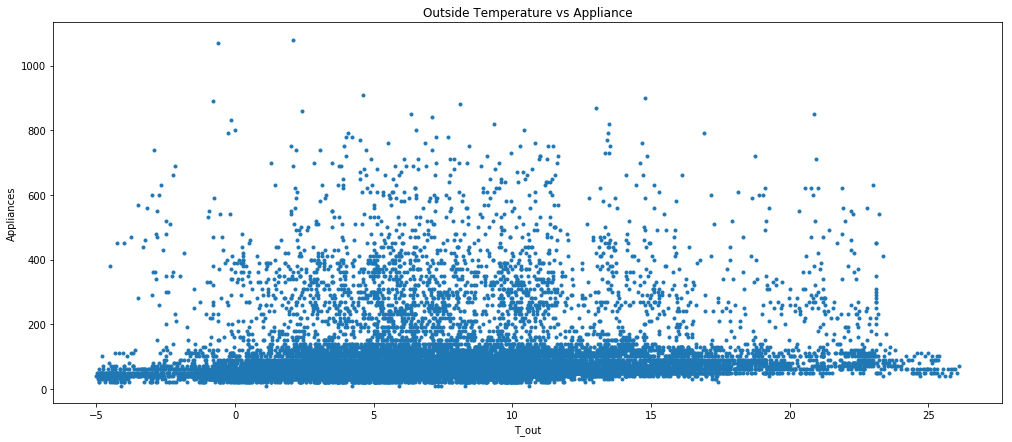

In [17]:
fig = plt.figure(figsize = (17, 7))
ax = fig.add_subplot(111)
ax.scatter(tempOut, appEnergy, marker = '.')
ax.set(xlabel = Xlabels[18], ylabel = Tlabels[0], title = "Outside Temperature vs Appliance")
plt.show()

In [18]:
Tenergy[:, 1]

array([30., 30., 30., ..., 10., 10., 10.])

Doesn't seem like a linear relationship to me. Let's try some other combinations of inputs and targets.

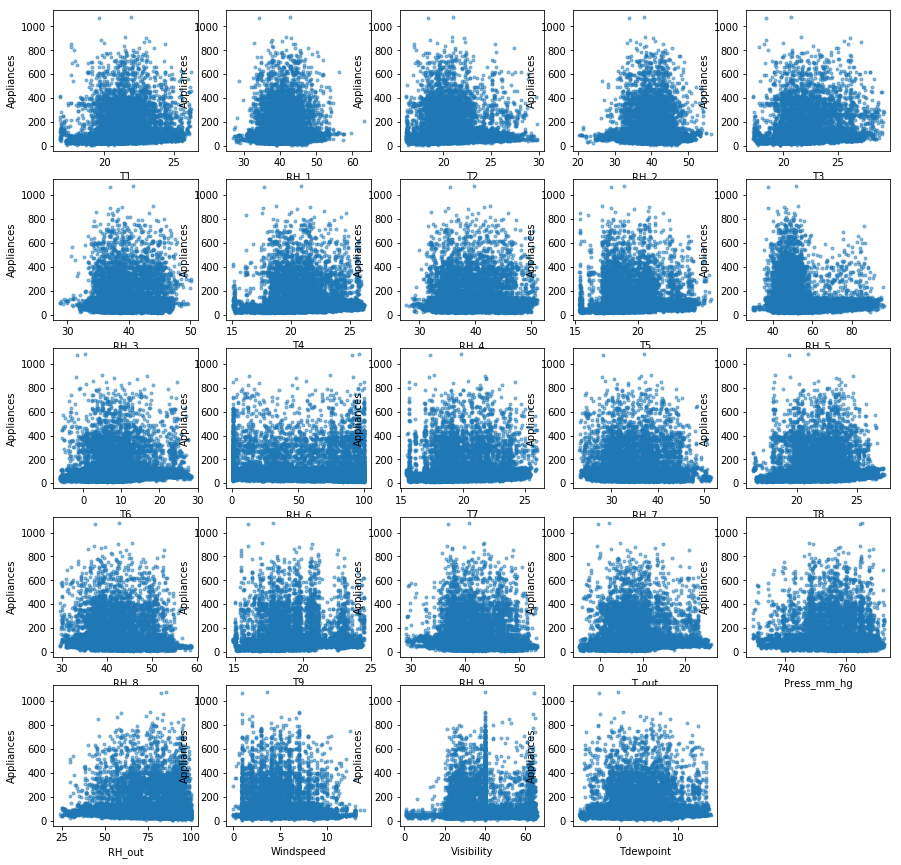

In [19]:
plt.figure(figsize=(15, 15))
for c in range(Xenergy.shape[1]):
    plt.subplot(5,5, c+1)
    plt.plot(Xenergy[:, c], Tenergy[:, 0], '.', alpha=0.5)
    plt.ylabel(Tlabels[0])
    plt.xlabel(Xlabels[c])

Let's plot all these against the light energy.

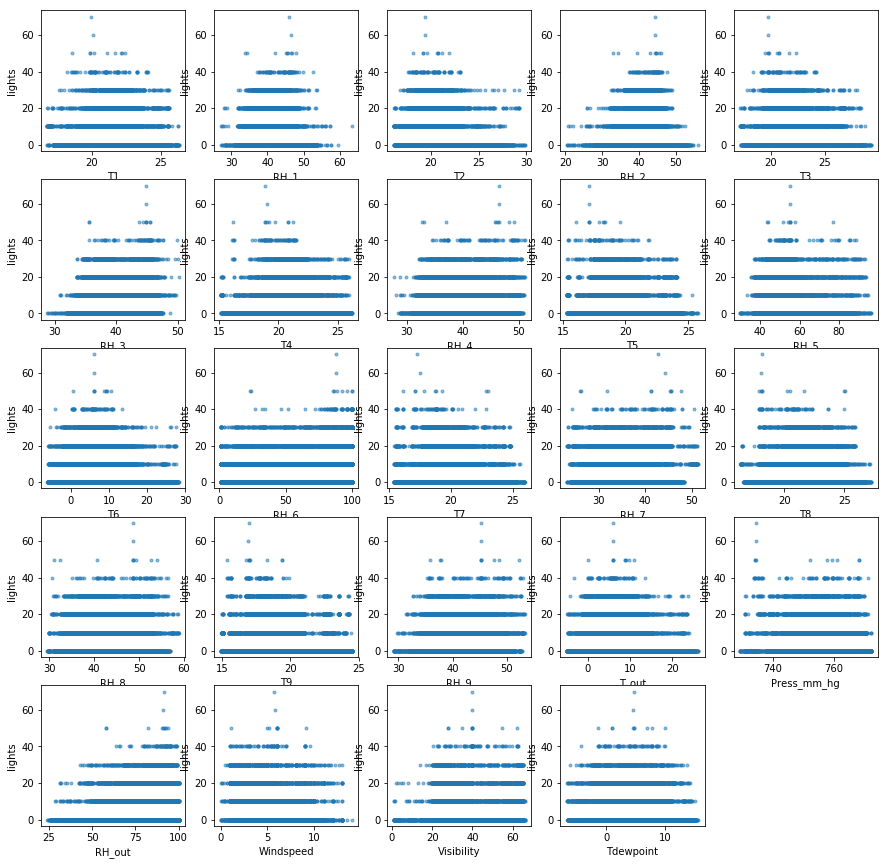

In [20]:
plt.figure(figsize=(15, 15))
for c in range(Xenergy.shape[1]):
    plt.subplot(5,5, c+1)
    plt.plot(Xenergy[:, c], Tenergy[:, 1], '.', alpha=0.5)
    plt.ylabel(Tlabels[1])
    plt.xlabel(Xlabels[c])

None of these seem like linear relationships. We may be able to fit a linear model to this data, but our predictions are probably not going to be very accurate.

## Results

Let's apply our fuctions to this data. But before that let's split the data into training (80 %) and testing (20 %) datasets.

In [21]:
# Split into training (80 %) and testing data (20 %).
nRows = Xenergy.shape[0]
nTrain = int(round(0.8*nRows)) 
nTest = nRows - nTrain

# Shuffle row numbers
rows = np.arange(nRows)
np.random.shuffle(rows)

trainIndices = rows[:nTrain]
testIndices = rows[nTrain:]

Xtrain = Xenergy[trainIndices, :]
Ttrain = Tenergy[trainIndices, :]
Xtest = Xenergy[testIndices, :]
Ttest = Tenergy[testIndices, :]

Now, let's apply our functions.

In [22]:
# Use functions to predict.

# 1. Using first function.
model = train(Xtrain, Ttrain)
predict = use(model, Xtest)
rmerr = rmse(predict, Ttest)

# 2. Using the second function.
model2 = trainSGD(Xtrain, Ttrain, 0.01, 100)
predict2 = use(model2, Xtest)
rmerr2 = rmse(predict2, Ttest)

In [23]:
rmerr

67.9409053530142

In [24]:
rmerr2

70.84106683052362

In [ ]:
model2 = trainSGD(Xtrain, Ttrain, 0.001, 100)
predict2 = use(model2, Xtest)
rmerr2 = rmse(predict2, Ttest)
rmerr2

68.36174347604484

In [ ]:
model2 = trainSGD(Xtrain, Ttrain, 0.005, 100)
predict2 = use(model2, Xtest)
rmerr2 = rmse(predict2, Ttest)
rmerr2

In [ ]:
model2 = trainSGD(Xtrain, Ttrain, 0.0001, 100)
predict2 = use(model2, Xtest)
rmerr2 = rmse(predict2, Ttest)
rmerr2

In [ ]:
model2 = trainSGD(Xtrain, Ttrain, 0.02, 100)
predict2 = use(model2, Xtest)
rmerr2 = rmse(predict2, Ttest)
rmerr2

In [ ]:
model2 = trainSGD(Xtrain, Ttrain, 0.04, 100)
predict2 = use(model2, Xtest)
rmerr2 = rmse(predict2, Ttest)
rmerr2

In [ ]:
model2 = trainSGD(Xtrain, Ttrain, 0.05, 100)
predict2 = use(model2, Xtest)
rmerr2 = rmse(predict2, Ttest)
rmerr2

The RMSE values become flat at around 68, at values lesser than a learning rate of 0.01. Anything higher than this value seems to make the RMSE shoot up to high values. At 0.05 it goes up to around 166. 

Let's plot the predicted and actual energy values for a learning rate of 0.01. 

In [ ]:
model2 = trainSGD(Xtrain, Ttrain, 0.01, 100)
predict2 = use(model2, Xtest)
rmerr2 = rmse(predict2, Ttest)

For the following plots: green - predicted and red - actual values.

In [ ]:
figt = plt.figure(figsize = (20, 5))
axt = figt.add_subplot(111)
axt.plot(predict2[:100, 0], linewidth = 1, color = 'g')
axt.set(title = 'Predicted vs Target Appliance Energy Usage', ylabel = "Value")
# Target
axt2 = figt.add_subplot(111)
axt2.plot(Ttest[:100, 0], linewidth = 1, color = 'r')
plt.show()

It can be seen in some areas that it does seem to be making good predictions (at around the 5th sample or so). The predictions don't seem to be very accurate.

In [ ]:
figt = plt.figure(figsize = (20, 5))
axt = figt.add_subplot(111)
axt.plot(predict2[:100, 1], linewidth = 1, color = 'g')
axt.set(title = 'Predicted vs Target Light Energy Usage', ylabel = "Value")
# Target
axt2 = figt.add_subplot(111)
axt2.plot(Ttest[:100, 1], linewidth = 1, color = 'r')
plt.show()

Likewise, the light energy prediction is'nt that accurate either. But in same places, we can see the algorithm making pretty accurate matches like in the first 10 observations, and also just after the 60th observation. 

For the first model.

Appliance Energy

In [ ]:
# 1. Using first function.
model = train(Xtrain, Ttrain)
predict = use(model, Xtest)

figt = plt.figure(figsize = (20, 5))
axt = figt.add_subplot(111)
axt.plot(predict[:100, 0], linewidth = 1, color = 'g')
axt.set(title = 'Predicted vs Target Appliance Energy Usage', ylabel = "Value")
# Target
axt2 = figt.add_subplot(111)
axt2.plot(Ttest[:100, 0], linewidth = 1, color = 'r')
plt.show()

For the light energy

In [ ]:
# 1. Using first function.
model = train(Xtrain, Ttrain)
predict = use(model, Xtest)

figt = plt.figure(figsize = (20, 5))
axt = figt.add_subplot(111)
axt.plot(predict[:100, 1], linewidth = 1, color = 'g')
axt.set(title = 'Predicted vs Target Appliance Energy Usage', ylabel = "Value")
# Target
axt2 = figt.add_subplot(111)
axt2.plot(Ttest[:100, 1], linewidth = 1, color = 'r')
plt.show()

Let's check out the weights assigned to each attribute for the first model and see if we can eliminate any of them.

### Model 1

In [ ]:
Xtraintest = np.insert(Xtrain, 0, 1, 1)
w = np.linalg.lstsq(Xtraintest.T @ Xtraintest, Xtraintest.T @ Ttrain, rcond = None)
w = w[0] # to only keep the weights, and discard other information returned by lstsq
w

In [ ]:
for weights,name in zip(w.flat, Xlabels):
    print('{:8.3f}  {:s}'.format(weights, name))

But we know that, the range of the variables might also affect the weight. So let's look at the same after standardization.

In [ ]:
Xcopy = Xtrain
meansX = Xcopy.mean(axis = 0)
stdX = Xcopy.std(axis = 0)
Xstd = (Xcopy - meansX) / stdX

In [ ]:
Xtraintest = np.insert(Xcopy, 0, 1, 1)
w = np.linalg.lstsq(Xcopy.T @ Xcopy, Xcopy.T @ Ttrain, rcond = None)
w = w[0] # to only keep the weights, and discard other information returned by lstsq
w

In [ ]:
for weights,name in zip(w.flat, Xlabels):
    print('{:8.3f}  {:s}'.format(weights, name))

If we observe now we can notice that the attributes with the least magnitutde of weights are RH_5, T1, RH_6,RH_9, Press_mm_hg and Tdewpoint. Let's remove these attributes and fit the linear model again.

In [ ]:
# Remove columns from Xtrain.
Xtrain2 = np.delete(Xtrain, [0, 9, 11, 17, 19, 23] ,axis = 1)
Xtrain2.shape

In [ ]:
# Remove from Xtest
Xtest2 = np.delete(Xtest, [0, 9, 11, 17, 19, 23] ,axis = 1)
Xtest2.shape

In [ ]:
# Use Xtrain2 to fit model
# 1. Using first function.
model = train(Xtrain2, Ttrain)
predict = use(model, Xtest2)
rmerr4 = rmse(predict, Ttest)
rmerr4

In [ ]:
# 2. Using the second function.
model2 = trainSGD(Xtrain2, Ttrain, 0.01, 100)
predict2 = use(model2, Xtest2)
rmerr5 = rmse(predict2, Ttest)
rmerr5

Even after removing these columns, the RMSE seems to remain the same. Let's plot this.

### For first function

Red - actual data

Green - predicted data

### Appliance Data

In [ ]:
figt = plt.figure(figsize = (20, 5))
axt = figt.add_subplot(111)
axt.plot(predict[:100, 0], linewidth = 1, color = 'g')
axt.set(title = 'Predicted vs Target Appliance Energy Usage', ylabel = "Value")
# Target
axt2 = figt.add_subplot(111)
axt2.plot(Ttest[:100, 0], linewidth = 1, color = 'r')
plt.show()

### Lights Data

In [ ]:
figt = plt.figure(figsize = (20, 5))
axt = figt.add_subplot(111)
axt.plot(predict[:100, 1], linewidth = 1, color = 'g')
axt.set(title = 'Predicted vs Target Light Energy Usage', ylabel = "Value")
# Target
axt2 = figt.add_subplot(111)
axt2.plot(Ttest[:100, 1], linewidth = 1, color = 'r')
plt.show()

### For SGD

### Appliances

In [ ]:
figt = plt.figure(figsize = (20, 5))
axt = figt.add_subplot(111)
axt.plot(predict2[:100, 0], linewidth = 1, color = 'g')
axt.set(title = 'Predicted vs Target Appliance Energy Usage', ylabel = "Value")
# Target
axt2 = figt.add_subplot(111)
axt2.plot(Ttest[:100, 0], linewidth = 1, color = 'r')
plt.show()

### Lights

In [ ]:
figt = plt.figure(figsize = (20, 5))
axt = figt.add_subplot(111)
axt.plot(predict2[:100, 1], linewidth = 1, color = 'g')
axt.set(title = 'Predicted vs Target Appliance Energy Usage', ylabel = "Value")
# Target
axt2 = figt.add_subplot(111)
axt2.plot(Ttest[:100, 1], linewidth = 1, color = 'r')
plt.show()

## Prognosis

The linear model, apparently, doesn't seem to fit well to this dataset at all. The Root Mean Squared error seems to be too high (in the case of both methods) at around 68 - 70. I also looked into the weights assigned to each feature (in the first method) and removed those features which did not have a large magnitude of weight assigned to it. But however, the RMSE still remained pretty much the same. 

I think one of the reasons as to why I'm getting a high RMSE might be to do with the fact that, there didn't seem to be a very linear relationship between the features and the energy values (of both lights and appliances). Therefore, our linear model wasn't probably very good at making predictions. 